# TODO
Specif Sensiti - trafnosci w poszczegolnych klasach naczynia tło, Prec - ... miary
porównanie sato z machine learning


# Segmenting Retinal Blood Vessels With Deep Neural Networks


In [154]:
import skimage as ski
from skimage import io, exposure, data, color, data, filters, graph, measure, morphology
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from PIL import Image
from scipy import ndimage as ndi


from image_processing import *
from functions import *

filename = 'Data/01_dr.jpg'
mask_filename = 'Data/01_dr_mask.tif'
manual_filename = 'Data/01_dr.tif'

image = loadImage(filename)
mask = loadImageTif(mask_filename)
manual = loadImageTif(manual_filename)

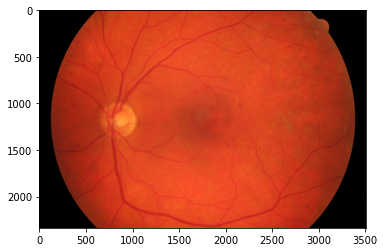

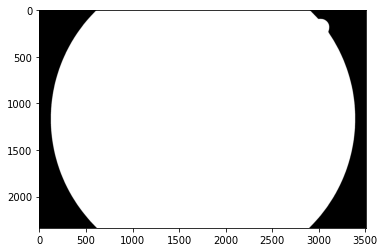

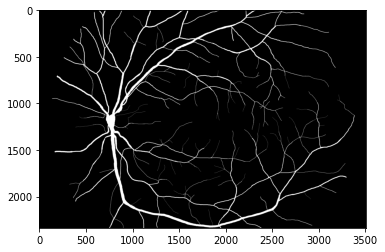

In [116]:
showImage(image)
showImage(mask)
showImage(manual)

# Sato filter

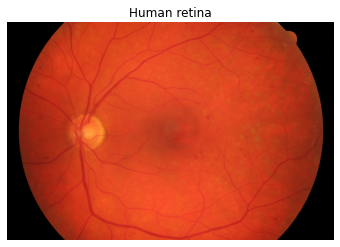

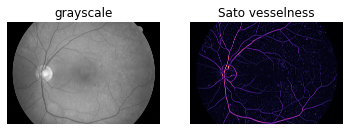

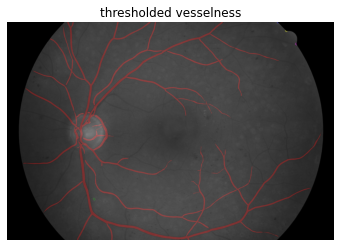

In [118]:
retina_source = loadImage(filename)

# data.retina()

_, ax = plt.subplots()
ax.imshow(retina_source)
ax.set_axis_off()
_ = ax.set_title('Human retina')

retina = color.rgb2gray(retina_source)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
# vessels = ski.filters.frangi(retina, sigmas=range(1, 10)) * mask
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('thresholded vesselness')


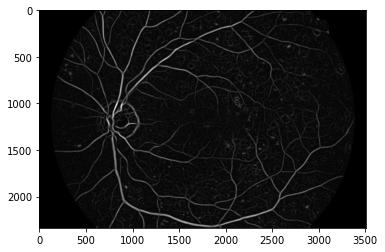

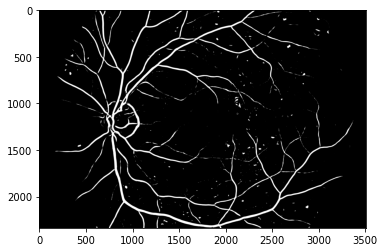

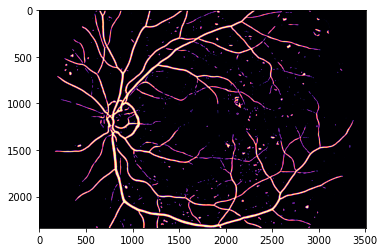

In [120]:
image = loadImage(filename)

vessels = extract_vessels(image)
showImage(vessels)
vessels = contrast(vessels)
showImage(vessels)
vessels = threshold(vessels)
showImage(vessels, cmap='magma')

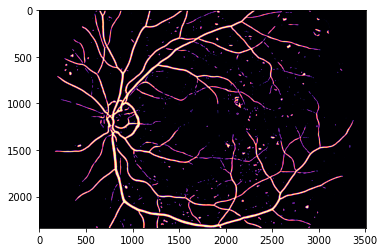

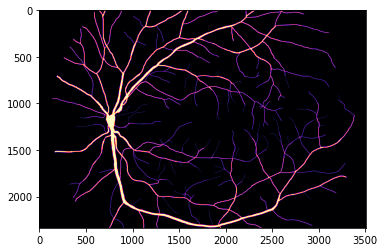

In [121]:
showImage(vessels, cmap='magma')
showImage(manual, cmap='magma')

# Comparing vessels 

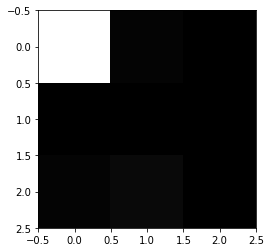

[[7644494  124568       0]
 [      0       0       0]
 [ 147443  268839       0]]
Accuracy:  0.933924585209858


In [ ]:
image = metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# załóżmy, że mamy dane treningowe i testowe oraz nauczony klasyfikator
y_true = manual.flatten()

# dokonaj klasyfikacji na podstawie obrazka "vessels"
y_pred = vessels.flatten()

# utwórz macierz pomyłek
conf_matrix = confusion_matrix(y_true, y_pred)

# wyświetl macierz pomyłek
showImage(conf_matrix)
print(conf_matrix)
print('Accuracy: ', accuracy_score(y_true, y_pred))

In [ ]:
both_vessels = np.logical_and(vessels, manual)
wrong_vessels = np.logical_xor(vessels, manual)
all_vessels = np.logical_or(vessels, manual)
print("Sensitivity:" , round(sum(both_vessels.flatten() + sum(wrong_vessels.flatten())) / sum(all_vessels.flatten())*100, 3), "%")

<ipython-input-114-5da2418774eb>:4: RuntimeWarning: overflow encountered in scalar add
  print("Sensitivity:" , round(sum(both_vessels.flatten() + sum(wrong_vessels.flatten())) / sum(all_vessels.flatten())*100, 3), "%")


Sensitivity: 316319.921 %


In [ ]:
y_true = manual.flatten()
y_pred = vessels.flatten()

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.933924585209858


In [156]:
y_pred = vessels.flatten()		# True - żyły, False - tło
y_true = manual.flatten()		# 255 - żyły, 0 - tło

model_mask = (y_true > 1)	# maska pikseli, które reprezentują żyły w modelu ekspertskim

y_true_masked = np.zeros(y_true.shape, dtype=bool)
y_true_masked[model_mask] = True

y_pred_masked = np.zeros(y_pred.shape, dtype=bool)
y_pred_masked[model_mask] = y_pred[model_mask]

accuracy = accuracy_score(y_true.flatten(), y_pred_masked.flatten())
# precision = precision_score(y_true.flatten(), y_pred_masked.flatten())
# recall = recall_score(y_true.flatten(), y_pred_masked.flatten())

print(f"Accuracy score: {accuracy:.4f}")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy score: {accuracy:.4f}")

# showImage(y_true.reshape(vessels.shape))
# showImage(y_pred_masked.reshape(vessels.shape))

# print(f"Precision score: {precision:.4f}")
# print(f"Recall score: {recall:.4f}")

print(classification_report(y_true, y_pred_masked, target_names=['background', 'vessels']))

Accuracy score: 0.9491
Accuracy score: 0.9209


ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

# REST

normal


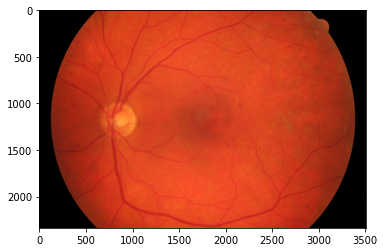

sharpen


C:\Users\Helena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\skimage\filters\_unsharp_mask.py:11: FutureWarning: Automatic detection of the color channel was deprecated in v0.19, and `channel_axis=None` will be the new default in v0.21. Set `channel_axis=-1` explicitly to silence this warning.
  blurred = gaussian(image, sigma=radius, mode='reflect')


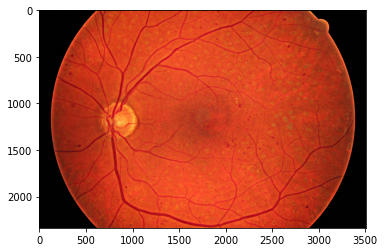

brightness


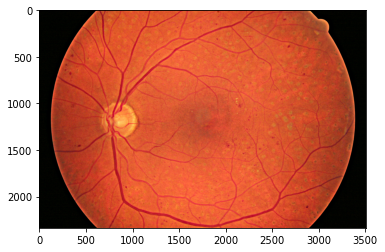

edges


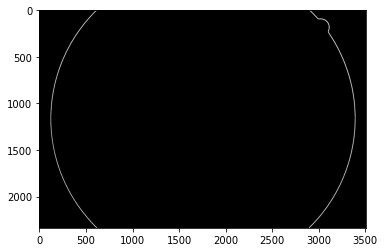

contrast image dark


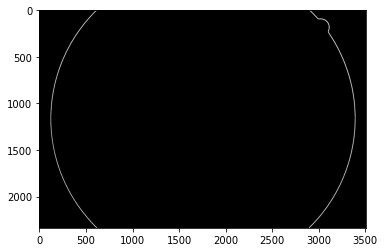

invert color


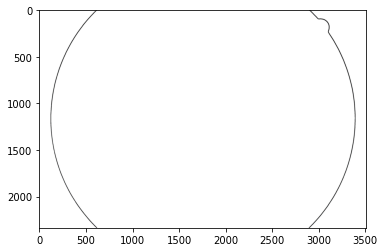

edges


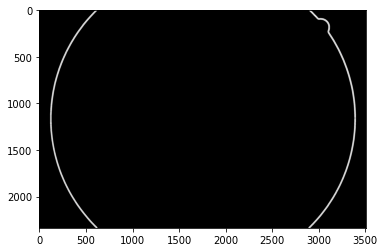

In [ ]:
image = loadImage(filename)
image_minmax_scaled = exposure.rescale_intensity(image)
# print("max:", image_minmax_scaled.max())
# print("min:", image_minmax_scaled.min())


# interpolacja liniowa
def interpolate(image):
	min, max = image.min(), image.max()
	arr_subtracted = image - min  # Subtract the minimum
	# array([  0,  38,  98, 203, 248], dtype=uint8)
	arr_divided = arr_subtracted / (max - min)  # Divide by new max
	# array([0.        , 0.15322581, 0.39516129, 0.81854839, 1.        ])
	arr_multiplied = arr_divided * 255  # Multiply by dtype max
	# array([  0.        ,  39.07258065, 100.76612903, 208.72983871,
	#        255.        ])
	# Convert dtype to original uint8
	arr_rescaled = np.asarray(arr_multiplied, dtype=image.dtype)
	# array([  0,  39, 100, 208, 255], dtype=uint8)
	return arr_rescaled

def erase_above_average(image):
	average = image.mean(axis=0).mean(axis=0)
	print(average)
	for i in range(len(image)):
		for j in range(len(image[i])):
			if image[i][j] < average/2:
				image[i][j] = average
	return image



pipeline = [("sharpen", sharpen), ("brightness", brightness), ("edges", findEdges)]

print("normal")
showImage(image)

for title, fun in pipeline:
	print(title)
	image = fun(image)
	showImage(image)

# print("sharpen")
# image = sharpen(image)
# showImage(image)

# print("adjust gamma")
# image = brightness(image)
# showImage(image)

# print("erase_above_average")
# image = erase_above_average(image)
# showImage(image)

# print("Sobel_h")
# image = ski.filters.sobel_h(gamma_img)
# showImage(image)

print("contrast image dark")
image = ski.exposure.rescale_intensity(image, in_range=(0.1, 0.9))
showImage(image)

print("invert color")
image = ski.util.invert(image)
showImage(image)

print("edges")
image = findEdges(image)
showImage(image)


# Frangi's filter

In [ ]:
# filtr frangi
def frangi(image):
	image = ski.filters.frangi(image, black_ridges=True)
	return image

# My version of transform (doesn't work yet)

Original image


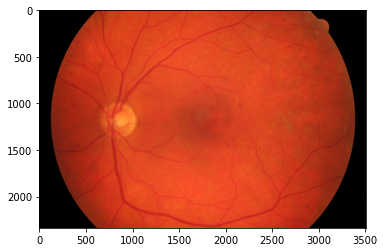

Extract green channel


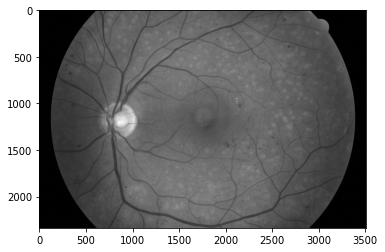

mask


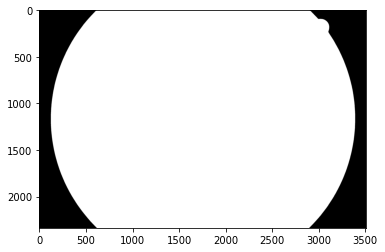

image with mask


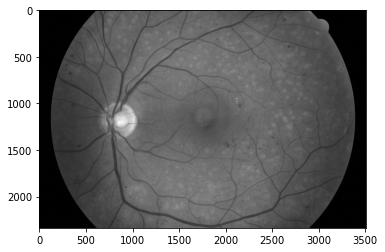

Frangi`s filter


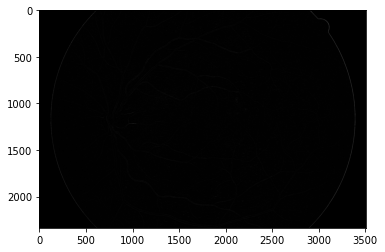

In [ ]:
image = loadImage(filename)
mask = loadImageTif(mask_filename)
print("Original image")
showImage(image)

sharpen_img = True
bright_img = True
contrast_img = True

# print("Edited image")
# if sharpen_img:
# 	image = sharpen(image)
# if bright_img:
# 	image = brightness(image)
# if contrast_img:
# 	image = contrast(image)
# showImage(image)

print("Extract green channel")
image = extract_green_channel(image)
showImage(image)

print("mask")
mask = mask[:, :, 0]
showImage(mask)

print("image with mask")
img = image * mask
showImage(image)
# for i in range(100,600,10):
# 	print(img[500][i])

print("Frangi`s filter")
for i in range(len(img)):
	average = np.average(img[i])
	for j in range(len(img[i])):
		if img[i][j] == 0:
			img[i][j] = average

image = frangi(img)
image = brightness(image)
#image = frangi(image)
showImage(image)


In [ ]:
# import matplotlib.pyplot as plt
# img = loadImage(filename)
# avg_patch = np.ones(shape=img.shape, dtype=np.uint8)*np.uint8(average)

# indices = np.argsort(counts)[::-1]   
# freqs = np.cumsum(np.hstack([[0], counts[indices]/float(counts.sum())]))
# rows = np.int_(img.shape[0]*freqs)

# dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
# for i in range(len(rows) - 1):
#     dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])
    
# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,6))
# ax0.imshow(avg_patch)
# ax0.set_title('Average color')
# ax0.axis('off')
# ax1.imshow(dom_patch)
# ax1.set_title('Dominant colors')
# ax1.axis('off')
# plt.show(fig)

In [ ]:
# import scipy


# def findEdges(images):
#     thresh = 0.2
#     list = []
#     for i in range(0, len(images)):
#         images [i] = scipy.ndimage.gaussian_filter(images[i], sigma=3)
#         images[i] = ski.filters.sobel(images[i]) ** 0.5
#         binary = (images[i] > thresh) * 255
#         binary = np.uint8(binary)
#         list.append(binary)
#     return list